In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [3]:
X, y = make_blobs(n_samples=50000, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9)

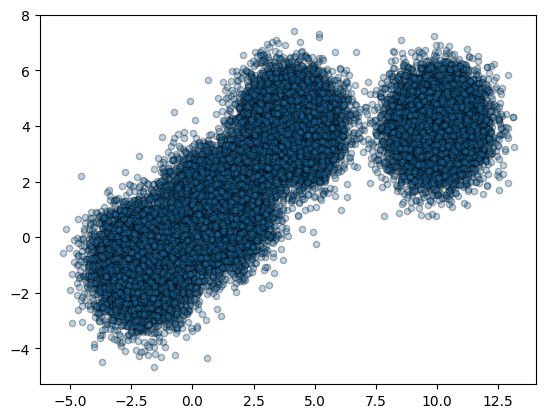

In [16]:
plt.scatter(X[:,0], X[:,1], marker='.', alpha=0.3, ec='k', s=80)

In [17]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [19]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 9.9970657 ,  3.98387692],
       [ 1.02505431,  1.00350587],
       [-2.00416812, -1.00000893],
       [ 4.00438213,  4.00068253]])

In [20]:
k_means_labels = k_means.labels_

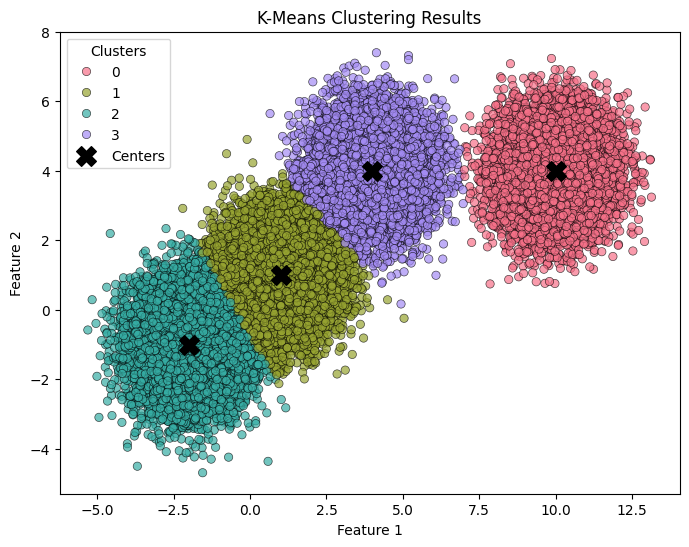

In [24]:
n_clusters = len(np.unique(k_means_labels))  # Number of clusters

# Define a color palette with enough distinct colors
palette = sns.color_palette("husl", n_clusters)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=k_means_labels, palette=palette, alpha=0.7, edgecolor='k')

# Plot cluster centers with a unique color (red)
plt.scatter(k_means_cluster_centers[:, 0], k_means_cluster_centers[:, 1], c='black', marker='X', s=200, label='Centers')

plt.legend(title="Clusters")
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [114]:
# https://www.kaggle.com/datasets/ravalsmit/customer-segmentation-data
df = pd.read_csv('./../data/customer_segmentation_data.csv').drop(['Customer ID', 'Purchase History'], axis=1).drop(['Segmentation Group'], axis=1)

In [103]:
df.sample(5)

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
27424,36,Female,Divorced,Doctorate,Jharkhand,Entrepreneur,33717,policy1,Chat,policy5,874402,2896,Family,Text,In-Person Meeting,Weekends,French,Segment2
17287,20,Female,Married,High School Diploma,Goa,Salesperson,81703,policy1,Chat,policy5,264641,2802,Business,In-Person Meeting,In-Person Meeting,Morning,French,Segment3
21377,49,Male,Widowed,High School Diploma,Meghalaya,Lawyer,83175,policy1,Phone,policy4,402063,727,Group,In-Person Meeting,In-Person Meeting,Evening,French,Segment4
42983,46,Female,Single,Associate Degree,Tripura,Salesperson,119864,policy3,Phone,policy4,369682,4072,Family,In-Person Meeting,Text,Evening,English,Segment3
27938,19,Male,Widowed,Associate Degree,Gujarat,Lawyer,121507,policy1,Phone,policy2,312458,4598,Family,Mail,Email,Evening,Mandarin,Segment2


In [115]:
# one hot encoding for categorical features

categorical_features = df.select_dtypes(include=['object']).columns.to_list()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [116]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder()
encoded_cats = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_cats.toarray(), columns=encoder.get_feature_names_out())


In [117]:
df_preprocessed = pd.concat([df[numerical_features], encoded_df], axis=1)

In [118]:
df_preprocessed

,Age,Income Level,Coverage Amount,Premium Amount,Gender_Female,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,Education Level_Associate Degree,Education Level_Bachelor's Degree,Education Level_Doctorate,Education Level_High School Diploma,Education Level_Master's Degree,Geographic Information_Andaman and Nicobar Islands,Geographic Information_Andhra Pradesh,Geographic Information_Arunachal Pradesh,Geographic Information_Assam,Geographic Information_Bihar,Geographic Information_Chandigarh,Geographic Information_Chhattisgarh,Geographic Information_Dadra and Nagar Haveli,Geographic Information_Daman and Diu,Geographic Information_Delhi,Geographic Information_Goa,Geographic Information_Gujarat,Geographic Information_Haryana,Geographic Information_Himachal Pradesh,Geographic Information_Jharkhand,Geographic Information_Karnataka,Geographic Information_Kerala,Geographic Information_Lakshadweep,Geographic Information_Madhya Pradesh,Geographic Information_Maharashtra,Geographic Information_Manipur,Geographic Information_Meghalaya,Geographic Information_Mizoram,Geographic Information_Nagaland,...,Occupation_Teacher,Behavioral Data_policy1,Behavioral Data_policy2,Behavioral Data_policy3,Behavioral Data_policy4,Behavioral Data_policy5,Interactions with Customer Service_Chat,Interactions with Customer Service_Email,Interactions with Customer Service_In-Person,Interactions with Customer Service_Mobile App,Interactions with Customer Service_Phone,Insurance Products Owned_policy1,Insurance Products Owned_policy2,Insurance Products Owned_policy3,Insurance Products Owned_policy4,Insurance Products Owned_policy5,Policy Type_Business,Policy Type_Family,Policy Type_Group,Policy Type_Individual,Customer Preferences_Email,Customer Preferences_In-Person Meeting,Customer Preferences_Mail,Customer Preferences_Phone,Customer Preferences_Text,Preferred Communication Channel_Email,Preferred Communication Channel_In-Person Meeting,Preferred Communication Channel_Mail,Preferred Communication Channel_Phone,Preferred Communication Channel_Text,Preferred Contact Time_Afternoon,Preferred Contact Time_Anytime,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Preferred Contact Time_Weekends,Preferred Language_English,Preferred Language_French,Preferred Language_German,Preferred Language_Mandarin,Preferred Language_Spanish
0,23,70541,366603,2749,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,26,54168,780236,1966,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,29,73899,773926,4413,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,20,63381,787815,4342,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,25,38794,366506,1276,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0

In [119]:
X = df_preprocessed.values

In [120]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [122]:
n_clusters = 5
k_means = KMeans(init="k-means++", n_clusters=n_clusters, n_init=12)
k_means.fit(X_std)

KMeans(n_clusters=5, n_init=12)

In [130]:
labels = k_means.labels_
df_preprocessed["Cluster"] = labels

In [131]:
df_preprocessed.groupby('Cluster').mean()

,Age,Income Level,Coverage Amount,Premium Amount,Gender_Female,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,Education Level_Associate Degree,Education Level_Bachelor's Degree,Education Level_Doctorate,Education Level_High School Diploma,Education Level_Master's Degree,Geographic Information_Andaman and Nicobar Islands,Geographic Information_Andhra Pradesh,Geographic Information_Arunachal Pradesh,Geographic Information_Assam,Geographic Information_Bihar,Geographic Information_Chandigarh,Geographic Information_Chhattisgarh,Geographic Information_Dadra and Nagar Haveli,Geographic Information_Daman and Diu,Geographic Information_Delhi,Geographic Information_Goa,Geographic Information_Gujarat,Geographic Information_Haryana,Geographic Information_Himachal Pradesh,Geographic Information_Jharkhand,Geographic Information_Karnataka,Geographic Information_Kerala,Geographic Information_Lakshadweep,Geographic Information_Madhya Pradesh,Geographic Information_Maharashtra,Geographic Information_Manipur,Geographic Information_Meghalaya,Geographic Information_Mizoram,Geographic Information_Nagaland,...,Occupation_Teacher,Behavioral Data_policy1,Behavioral Data_policy2,Behavioral Data_policy3,Behavioral Data_policy4,Behavioral Data_policy5,Interactions with Customer Service_Chat,Interactions with Customer Service_Email,Interactions with Customer Service_In-Person,Interactions with Customer Service_Mobile App,Interactions with Customer Service_Phone,Insurance Products Owned_policy1,Insurance Products Owned_policy2,Insurance Products Owned_policy3,Insurance Products Owned_policy4,Insurance Products Owned_policy5,Policy Type_Business,Policy Type_Family,Policy Type_Group,Policy Type_Individual,Customer Preferences_Email,Customer Preferences_In-Person Meeting,Customer Preferences_Mail,Customer Preferences_Phone,Customer Preferences_Text,Preferred Communication Channel_Email,Preferred Communication Channel_In-Person Meeting,Preferred Communication Channel_Mail,Preferred Communication Channel_Phone,Preferred Communication Channel_Text,Preferred Contact Time_Afternoon,Preferred Contact Time_Anytime,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Preferred Contact Time_Weekends,Preferred Language_English,Preferred Language_French,Preferred Language_German,Preferred Language_Mandarin,Preferred Language_Spanish
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,44.068913,82174.043176,495405.470877,3056.612767,0.485269,0.514731,0.257365,0.241280,0.180494,0.160176,0.160684,0.231629,0.151541,0.243989,0.197257,0.175584,0.027768,0.028276,0.035388,0.025906,0.036065,0.024890,0.025059,0.027599,0.032001,0.030308,0.030985,0.030477,0.037420,0.035896,0.029631,0.022181,0.017609,0.039621,0.030816,0.020488,0.029462,0.029970,0.027938,0.031155,...,1.0,0.185066,0.199966,0.305452,0.131561,0.177955,0.245005,0.175923,0.182018,0.210125,0.186929,0.260413,0.210125,0.192855,0.135794,0.200813,0.253810,0.226888,0.361835,0.157467,0.184389,0.191669,0.251947,0.165086,0.206908,0.164748,0.250423,0.192347,0.213850,0.178632,0.176769,0.129191,0.188283,0.266847,0.238910,0.188622,0.243143,0.260752,0.150525,0.156959
1,44.232263,84224.489764,483731.353865,3001.815743,0.476880,0.523120,0.223615,0.236322,0.173844,0.188669,0.177550,0.252559,0.171726,0.191140,0.197494,0.187081,0.027003,0.027003,0.036004,0.027886,0.036181,0.025768,0.029298,0.032121,0.025944,0.030533,0.028239,0.038299,0.040593,0.036181,0.033886,0.020473,0.021532,0.042711,0.032474,0.025944,0.026650,0.022767,0.024356,0.032827,...,0.0,0.189199,0.202083,0.312390,0.117543,0.178786,0.262972,0.145782,0.155489,0.251147,0.184610,0.246205,0.216378,0.194493,0.113660,0.229262,0.290858,0.227321,0.329686,0.152136,0.218320,0.179845,0.208789,0.200318,0.192729,0.155665,0.249029,0.188846,0.262619,0.143840,0.173315,0.143487,0.174197,0.266502,0.242499,0.153018,0.246205,0.275327,0.162196,0.163255
2,43.739656,81515.959